In [5]:
import re
import matplotlib.pyplot as plt
import pandas as pd
from collections import Counter
import csv
import sqlite3
from pymorphy2 import MorphAnalyzer
import requests
import json
from tqdm.auto import tqdm
import vk
from datetime import datetime
from time import sleep
import nltk
import random
from wordcloud import WordCloud
from tqdm.auto import tqdm
from random import randint
morph = MorphAnalyzer()
from pymorphy2 import MorphAnalyzer
import time
from string import punctuation
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
morph = MorphAnalyzer()
import string

In [6]:
df = pd.read_csv('princess_corpus.csv', encoding='utf-8')
con = sqlite3.connect('princess.db')
c = con.cursor()
df.to_sql(name='princess', con=con, if_exists='replace')

In [7]:
df

,Disney_Period,Text,Speaker_Status,Movie,Speaker,Year,UTTERANCE_NUMBER
0,EARLY,slave in the magic mirror come from the farthe...,NON-P,Snow White,queen,1937,1
1,EARLY,"what wouldst thou know, my queen ?",NON-P,Snow White,mirror,1937,2
2,EARLY,"magic mirror on the wall, who is the fairest o...",NON-P,Snow White,queen,1937,3
3,EARLY,"famed is thy beauty, majesty. but hold, a love...",NON-P,Snow White,mirror,1937,4
4,EARLY,alas for her ! reveal her name.,NON-P,Snow White,queen,1937,5
...,...,...,...,...,...,...,...
7743,LATE,we are never closing them again.,PRINCESS,Frozen,elsa,2013,984
7744,LATE,form on anna's boots.,PRINCESS,Frozen,elsa,2013,985
7745,LATE,"what? oh, elsa, they're beautiful, but you kno...",PRINCESS,Frozen,anna,2013,986
7746,LATE,look out. reindeer coming through!,NON-P,Frozen,kristoff,2013,987


### среднее число реплик по периодам

In [61]:
c.execute('SELECT Speaker_Status, Disney_Period FROM princess WHERE Disney_Period="EARLY" AND Speaker_Status="PRINCESS"')
len_early = c.fetchall()
len_early = len(len_early)

c.execute('SELECT Speaker_Status, Disney_Period FROM princess WHERE Disney_Period="MID" AND Speaker_Status="PRINCESS"')
len_mid = c.fetchall()
len_mid = len(len_mid)

c.execute('SELECT Speaker_Status, Disney_Period FROM princess WHERE Disney_Period="LATE" AND Speaker_Status="PRINCESS"')
len_late = c.fetchall()
len_late = len(len_late)

c.execute('SELECT Speaker_Status, Disney_Period FROM princess WHERE Disney_Period="EARLY"')
len_early1 = c.fetchall()
len_early1 = len(len_early1)

c.execute('SELECT Speaker_Status, Disney_Period FROM princess WHERE Disney_Period="MID"')
len_mid1 = c.fetchall()
len_mid1 = len(len_mid1)

c.execute('SELECT Speaker_Status, Disney_Period FROM princess WHERE Disney_Period="LATE"')
len_late1 = c.fetchall()
len_late1 = len(len_late1)

E = len_early / len_early1
M = len_mid / len_mid1
L = len_late / len_late1

d = [{'period': 'EARLY', 'count': len_early/len_early1}, {'period': 'MID', 'count': len_mid/len_mid1}, {'period': 'LATE', 'count': len_late/len_late1}]

df1

## Часть реплик принцесс от всех реплик в определенном периоде

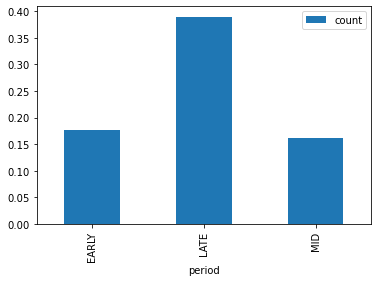

In [70]:
dff = df1.groupby('period')
dff.sum().plot.bar()